In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

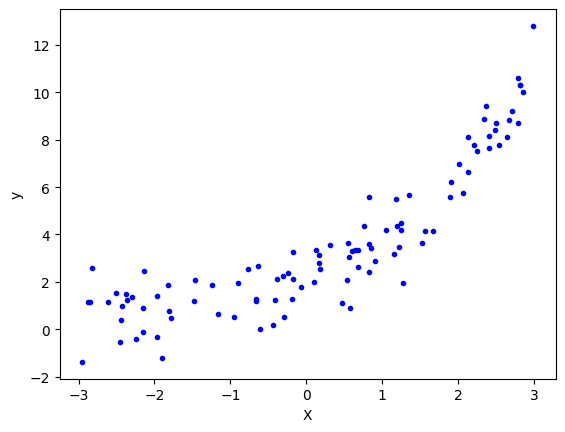

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# implement polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred = lin_reg.predict(X_test_poly)
r2_score(y_test, y_pred)

0.8634139899248225

Text(0, 0.5, 'y')

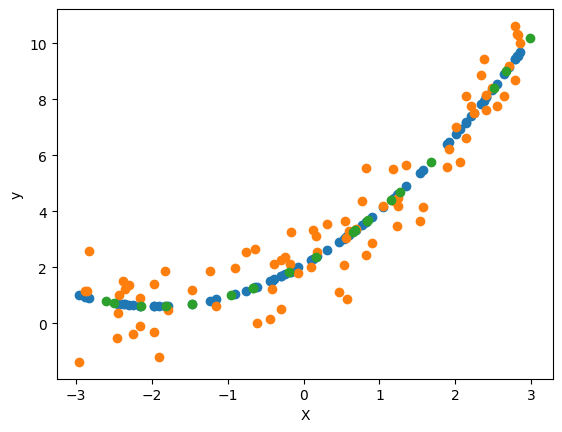

In [9]:
plt.scatter(X_train, lin_reg.predict(X_train_poly), label='train')
plt.scatter(X_train, y_train)
plt.scatter(X_test, lin_reg.predict(X_test_poly), label='test')
plt.xlabel('X')
plt.ylabel('y')

In [13]:
poly_features2 = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly2 = poly_features.fit_transform(X_train)
X_test_poly2 = poly_features.transform(X_test)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly2, y_train)
y_pred = lin_reg.predict(X_test_poly2)
r2_score(y_test, y_pred)

0.8634139899248225

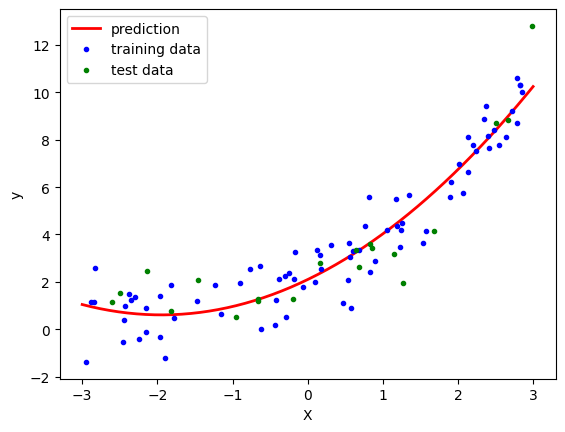

In [16]:
# prediction of new dataset
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='prediction')
plt.plot(X_train, y_train,'b.', label="training data")
plt.plot(X_test, y_test, 'g.',label= 'test data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#Pipline concept in polynomial regression

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
def poly_regression (degree):
  X_new = np.linspace (-3, 3, 200).reshape(200, 1)
  poly_features=PolynomialFeatures (degree=degree, include_bias=True)
  lin_reg=LinearRegression ()
  poly_regression=Pipeline([
  ("poly_features", poly_features),
  ("lin_reg",lin_reg)
  ])
  poly_regression.fit(X_train,y_train)
  y_pred_new=poly_regression.predict(X_new)
  #plotting prediction Line
  plt.plot(X_new, y_pred_new, 'r', label="Degree" + str(degree), linewidth= 3)
  plt.plot(X_train, y_train, "b.", linewidth=3)
  plt.plot(X_test, y_test, "g.", linewidth=3)
  plt.legend (loc= "upper left")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-4,4, 0, 10])

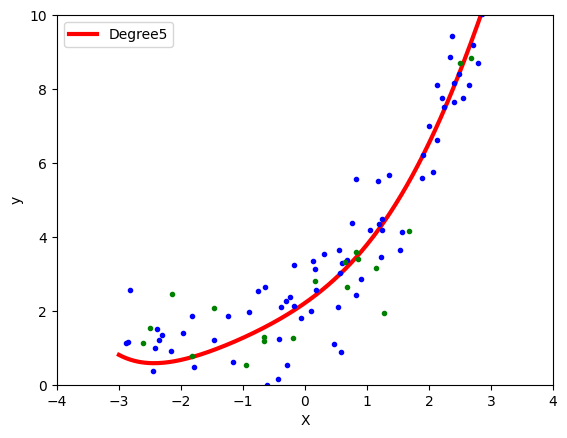

In [23]:
poly_regression(5)